*Reference*:
https://medium.com/@omar.ps16/stereo-3d-reconstruction-with-opencv-using-an-iphone-camera-part-iii-95460d3eddf0

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
input_img = cv2.imread("gdrive/My Drive/NCSU/DepthAI Hackathon/image samples/2020_10_02_10_07_35/faf057fc-c26f-4bd8-ad55-2ae06ab37aae/color.png")            # RGB image 
mask_image = cv2.imread("gdrive/My Drive/NCSU/DepthAI Hackathon/image samples/2020_10_02_10_07_35/faf057fc-c26f-4bd8-ad55-2ae06ab37aae/mask image.jpg")      # Segmentation mask image
disparity = cv2.imread("gdrive/My Drive/NCSU/DepthAI Hackathon/image samples/2020_10_02_10_07_35/faf057fc-c26f-4bd8-ad55-2ae06ab37aae/disparity_color.png")  # Disparity image

In [5]:
input_img  = cv2.resize(input_img, (1280, 720))
mask_image = cv2.resize(mask_image, (1280, 720))
mask_image = mask_image[:,:,2]                                                  # 2 for broadleaf and 1 for leaves/grass

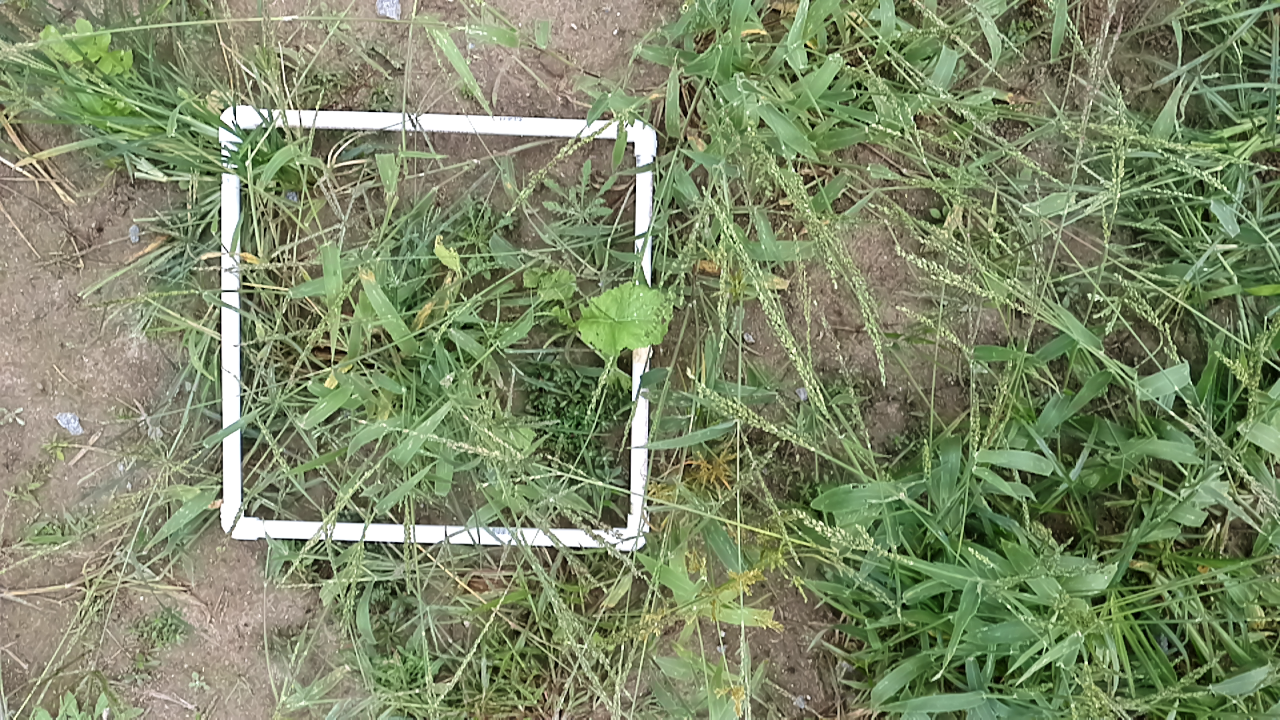

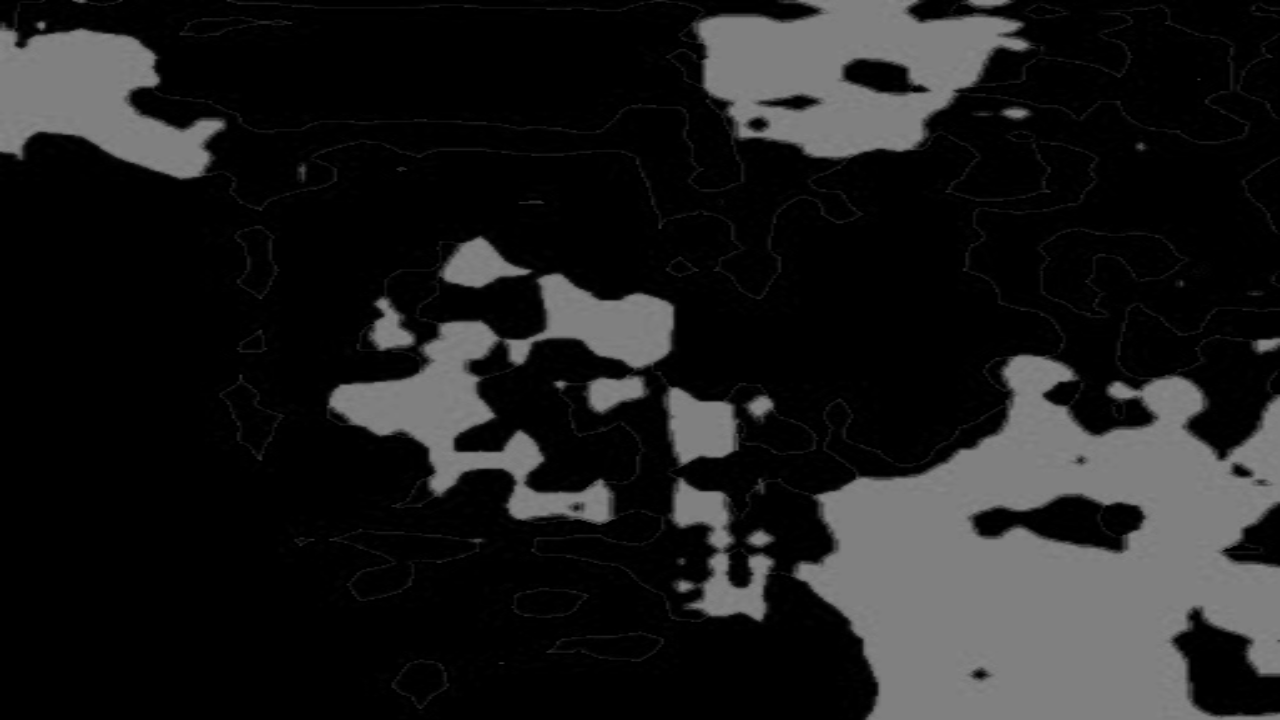

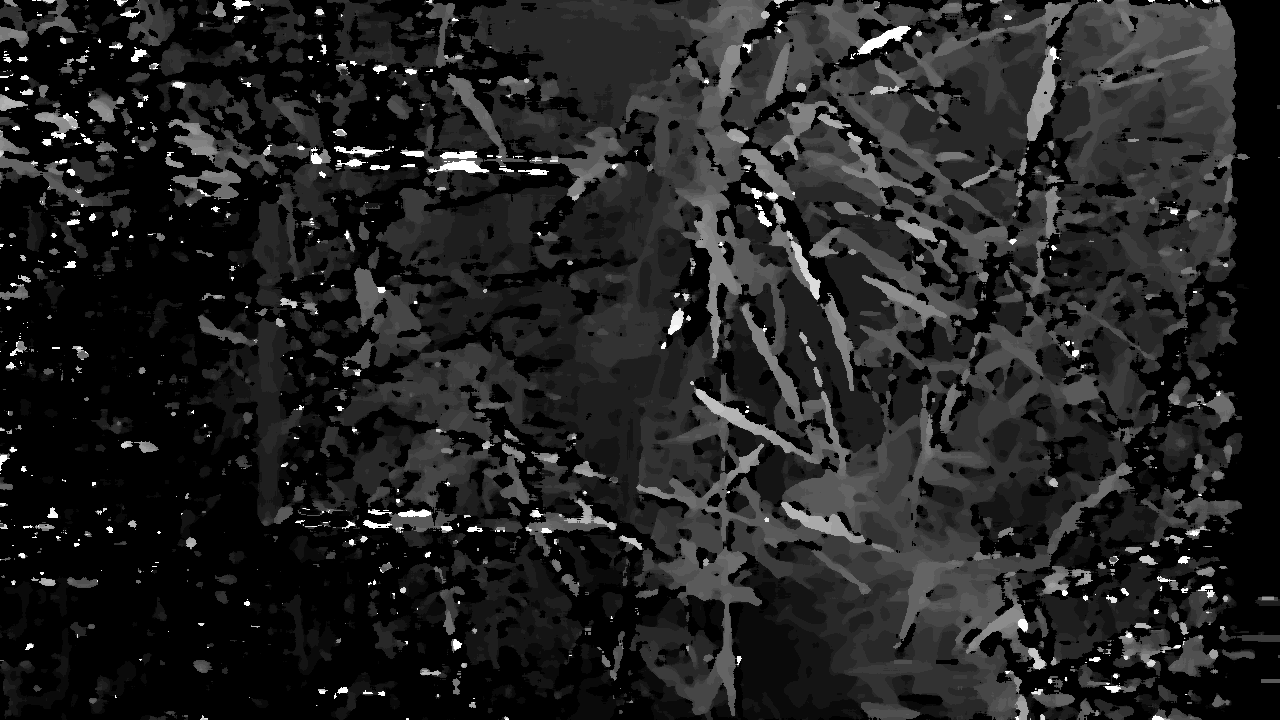

In [6]:
cv2_imshow(input_img)
cv2_imshow(mask_image)
cv2_imshow(disparity[:,:,1])

In [8]:
kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(mask_image, cv2.MORPH_OPEN, kernel)                # to remove noise or small error segmentations (temporary solution)

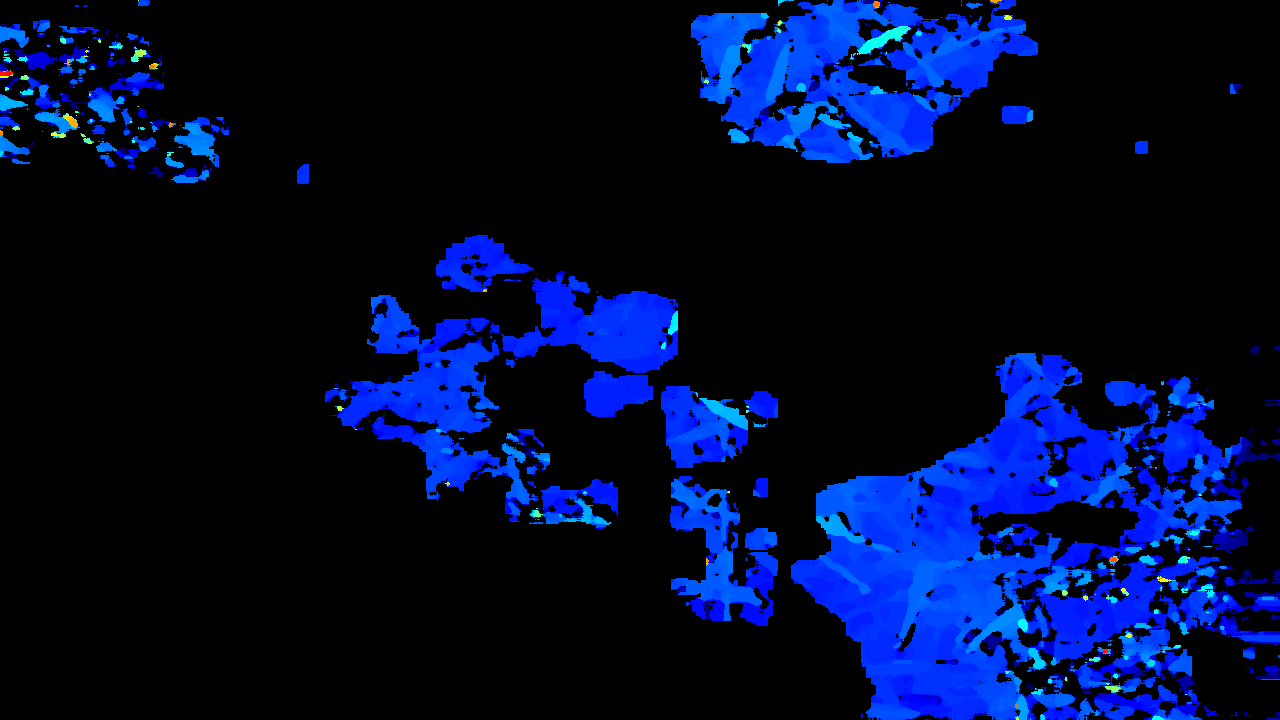

In [17]:
for x in range(720):
     for y in range(1280):
         if opening[x][y] == 0:
             disparity[x, y] = 0 
cv2_imshow(disparity) 

In [18]:
Q2 = np.float32([[1,0,0,0],
				        [0,-1,0,0],
			         	[0,0,8.6634*0.05,0], #Focal length multiplication obtained experimentally. for this refer the link given in the beginning of the colab (focal length * 0.05)
				        [0,0,0,1]])

points_3D = cv2.reprojectImageTo3D(disparity[:,:,1], Q2)

In [19]:
colors = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
#Get rid of points with value 0 (i.e no depth)
mask_map = disparity[:,:,1] > disparity[:,:,1].min()
#Mask colors and points. 
output_points = points_3D[mask_map]
output_colors = colors[mask_map]

In [20]:
output_file = 'gdrive/My Drive/NCSU/DepthAI Hackathon/image samples/2020_10_02_10_07_35/faf057fc-c26f-4bd8-ad55-2ae06ab37aae/point cloud.ply' # location to store .ply file

print ("\n Creating the output file... \n")

def create_output(vertices, colors, filename):
	colors = colors.reshape(-1,3)
	vertices = np.hstack([vertices.reshape(-1,3),colors])

	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar red
		property uchar green
		property uchar blue
		end_header
		'''
	with open(filename, 'w') as f:
		f.write(ply_header %dict(vert_num=len(vertices)))
		np.savetxt(f,vertices,'%f %f %f %d %d %d')


 Creating the output file... 



In [21]:
create_output(output_points, output_colors, output_file)                        # creates a .ply using a function stated above